<a href="https://colab.research.google.com/github/Arashi133/Arashi1331/blob/main/Lab1_PTXLA_22110266_LeTuongVy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install patool

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.1/98.1 kB 2.1 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import cv2 as cv
from cv2 import imwrite,imread
from matplotlib import pyplot as plt
from PIL import Image
import requests

In [ ]:
path = "/content/sample_data"
filename = "Lab01 - Image.rar"

In [5]:
import os
import patoolib

os.chdir(path)
patoolib.extract_archive(filename)

NameError: name 'path' is not defined

In [ ]:
os.chdir(path + "/Sample01")
os.listdir()

['motocycle.jpg',
 'rotated_cat_image_qua_90.jpg',
 'coffee.jpg',
 'rotated_cat_image.jpg',
 'cat.jpg']

In [ ]:
List_Img = os.listdir()

In [ ]:
print(List_Img[0])

motocycle.jpg


In [ ]:
def imshows(ImageData, LabelData, rows, cols, gridType = False):
  # Convert ImageData and LabelData to List
  ImageArray = list(ImageData)
  LabelArray = list(LabelData)
  if(rows == 1 & cols == 1):
    fig = plt.figure(figsize=(20,20))
  else:
    fig = plt.figure(figsize=(cols*8,rows*5))

  for i in range(1, cols * rows + 1):
      fig.add_subplot(rows, cols, i)
      image = ImageArray[i - 1]
      # If the channel number is less than 3, we display as grayscale image
      # otherwise, we display as color image
      if (len(image.shape) < 3):
          plt.imshow(image, plt.cm.gray)
          plt.grid(gridType)
      else:
          plt.imshow(image)
          plt.grid(gridType)
      plt.title(LabelArray[i - 1])
  plt.show()

In [ ]:
def ShowFourImages(IM1, IM2, IM3, IM4):
    imshows([IM1, IM2, IM3, IM4], ["Image 1","Image 2", "Image 3", "Image 4"], 2, 2)
def ShowThreeImages(IM1, IM2, IM3):
    imshows([IM1, IM2, IM3], ["Image 1","Image 2", "Image 3"], 1, 3)
def ShowTwoImages(IM1, IM2):
    imshows([IM1, IM2], ["Image 1","Image 2"], 1, 2)
def ShowOneImage(IM):
    imshows([IM], ["Image"], 1, 1)
def ShowListImages(listImage, row, col):
    listCaption = []
    for i in range(len(listImage)):
        listCaption.append(str(i))
    imshows(listImage,listCaption,row,col)

# **Goals**

* Learn to apply different geometric transformations to images, like translation, rotation, affine transformation etc.



# **Transformations**

OpenCV provides two transformation functions, cv.warpAffine and cv.warpPerspective, with which you can perform all kinds of transformations. cv.warpAffine takes a 2x3 transformation matrix while cv.warpPerspective takes a 3x3 transformation matrix as input.

# **Scaling**

Scaling is just resizing of the image. OpenCV comes with a function cv.resize() for this purpose. The size of the image can be specified manually, or you can specify the scaling factor. Different interpolation methods are used. Preferable interpolation methods are cv.INTER_AREA for shrinking and cv.INTER_CUBIC (slow) & cv.INTER_LINEAR for zooming. By default, the interpolation method cv.INTER_LINEAR is used for all resizing purposes. You can resize an input image with either of following methods:

In [ ]:
img = cv.imread('coffee.jpg')
# assert img is not None, "file could not be read, check with os.path.exists()"

# res = cv.resize(img,None,fx=2, fy=2, interpolation = cv.INTER_CUBIC)

# #OR

height, width = img.shape[:2]
# res1 = cv.resize(img,(10*width, 10*height), interpolation = cv.INTER_CUBIC)
# res2 = cv.resize(img,(int(0.1*width), int(0.1*height)), interpolation = cv.INTER_CUBIC)

In [ ]:
def resize_image(img, scale=None, new_size=None, interpolation=cv.INTER_CUBIC):
    """
    Resize an image either by scale or by specifying a new size.

    Parameters:
    - img: Input image to resize.
    - scale: Scaling factor for both width and height (e.g., scale=2 will double the size). Optional.
    - new_size: Tuple specifying the new size (width, height) in pixels. Optional.
    - interpolation: Interpolation method (default: cv.INTER_CUBIC).

    Returns:
    - res: Resized image.
    """
    height, width = img.shape[:2]

    if scale is not None:
        scale = tuple(scale)
        res = cv.resize(img, None, fx=scale[0], fy=scale[1], interpolation=interpolation)
    elif new_size is not None:
        res = cv.resize(img, new_size, interpolation=interpolation)
    else:
        raise ValueError("Either scale or new_size must be provided.")

    return res

In [ ]:
res1 = resize_image(img,scale = (10,10))
res2 = resize_image(img,new_size=(int(0.1*width), int(0.1*height)))

Before aply scalling

Original Dimensions :  (183, 275, 3)


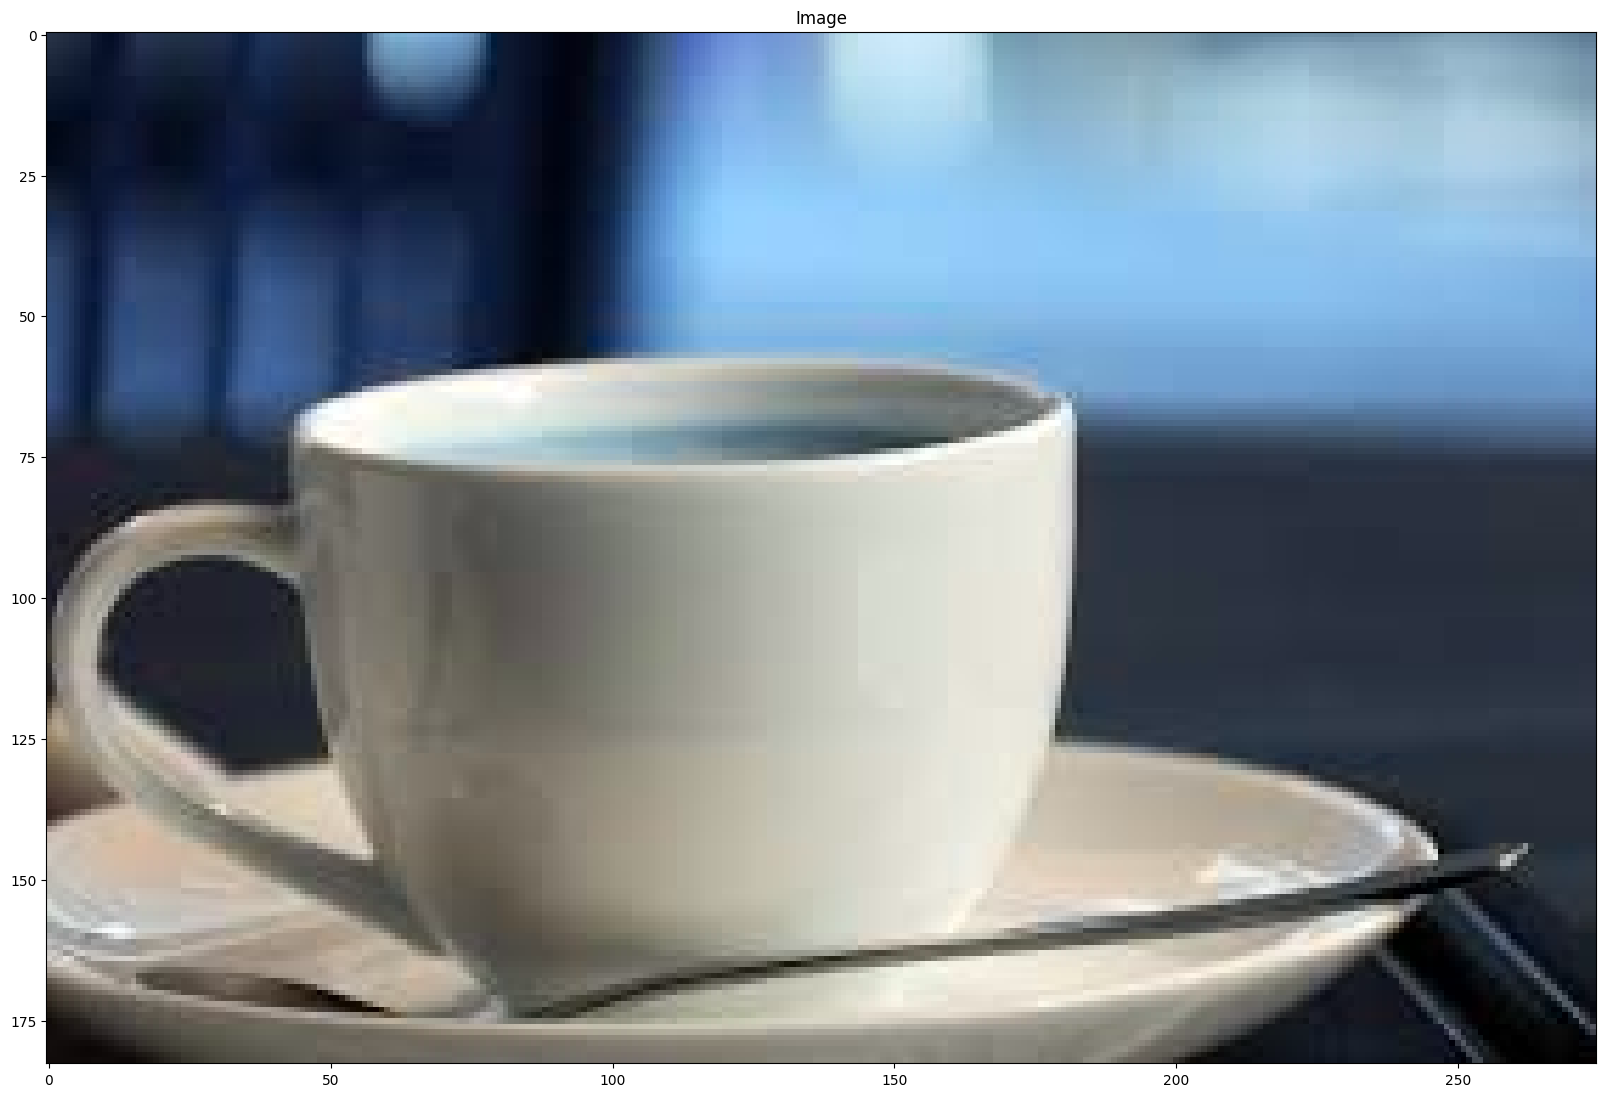

In [ ]:
print('Original Dimensions : ',img.shape)
ShowOneImage(img)

After Apply scale up

Increase Dimensions :  (1830, 2750, 3)


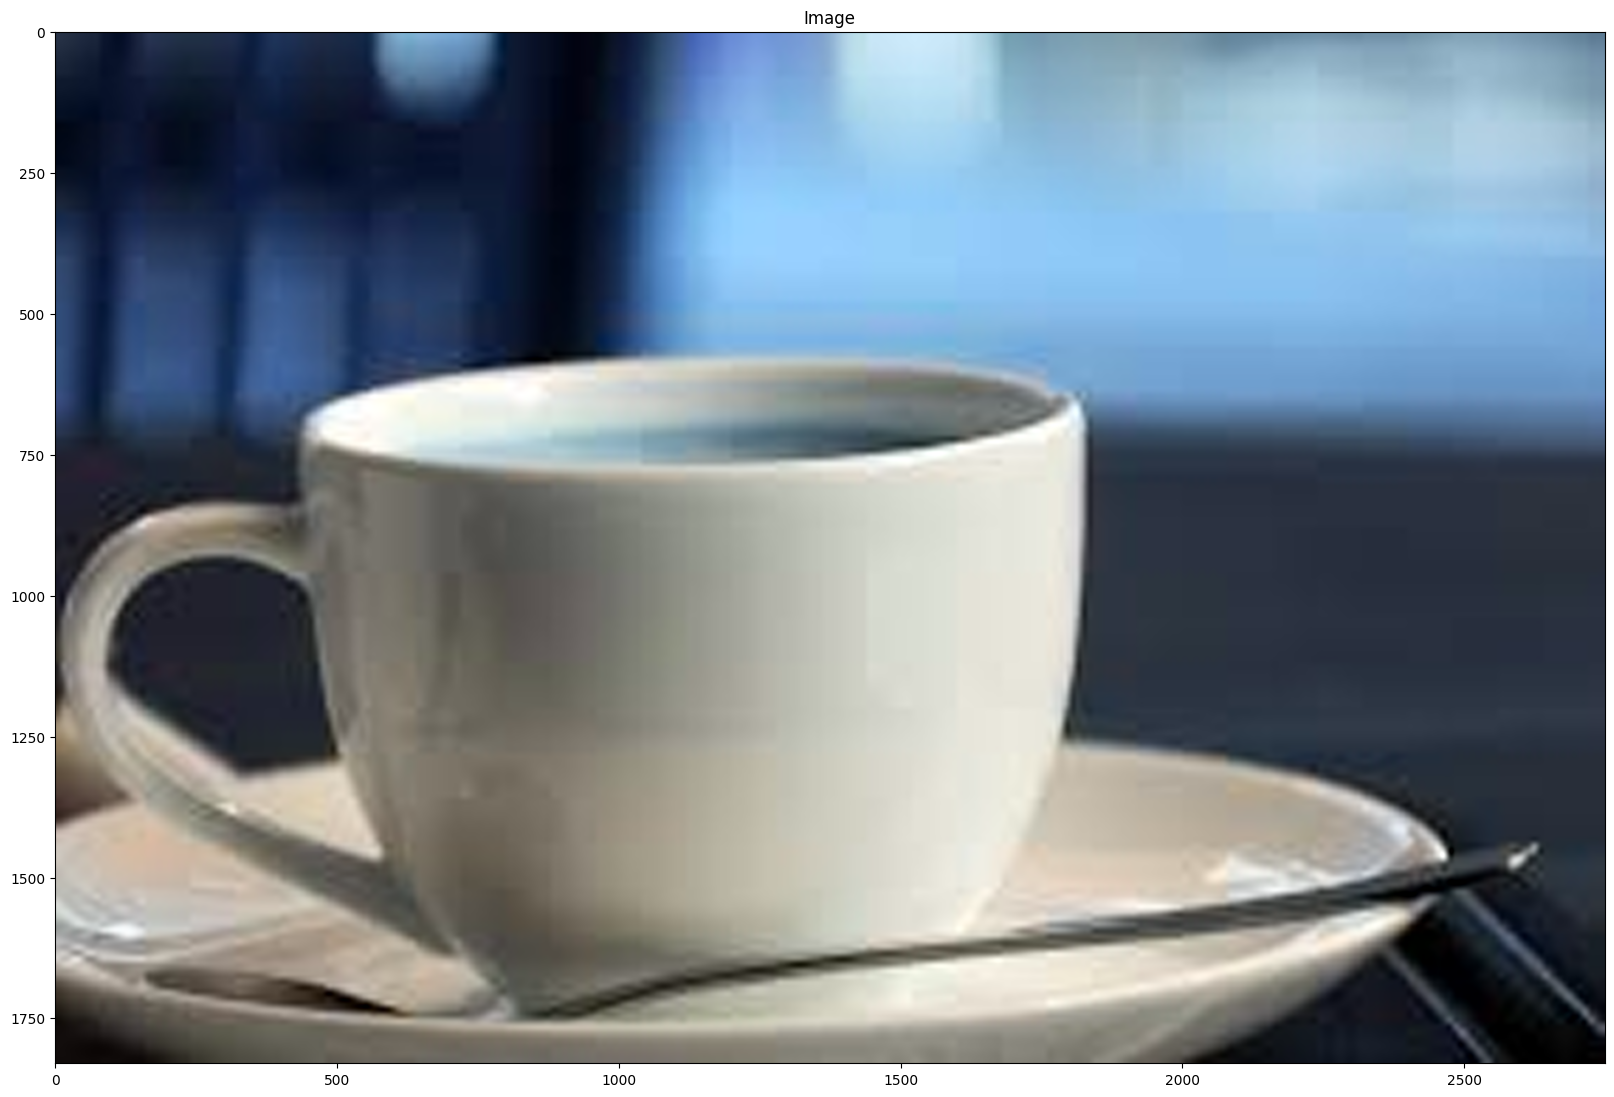

In [ ]:
print('Increase Dimensions : ',res1.shape)
ShowOneImage(res1)

After apply scale down

reduce Dimensions :  (18, 27, 3)


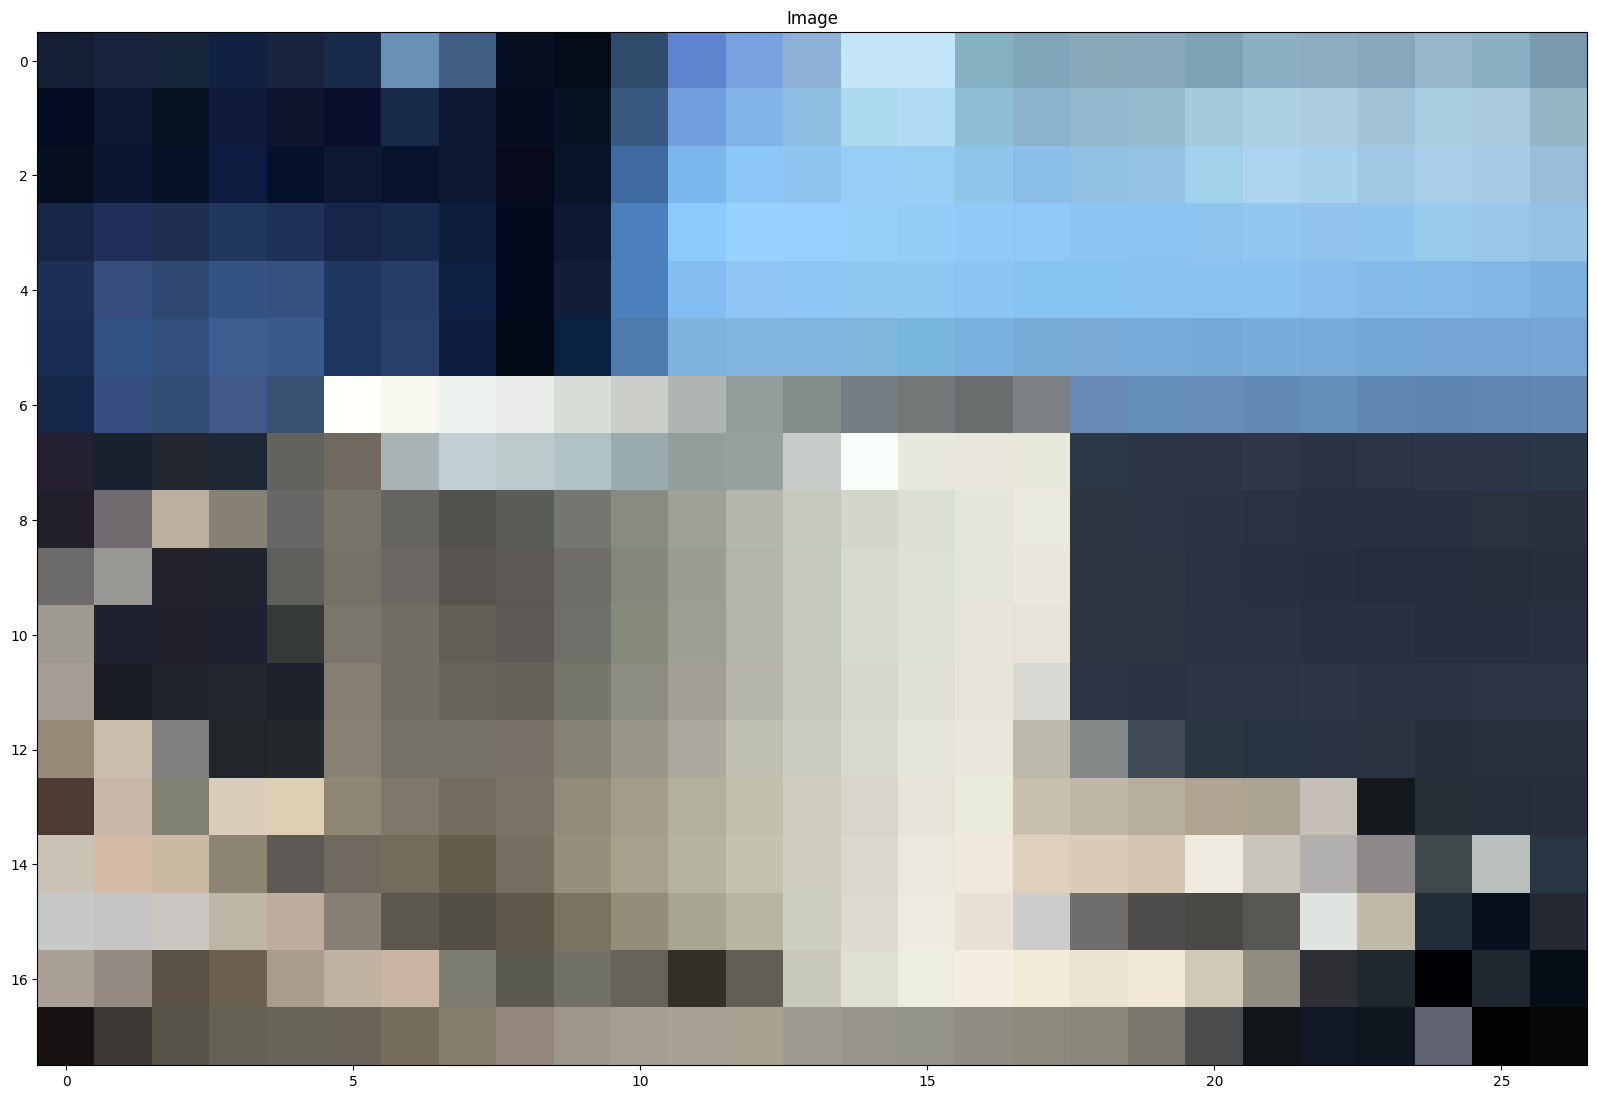

In [ ]:
print('reduce Dimensions : ',res2.shape)
ShowOneImage(res2)

# **Translation**

Translation is the shifting of an object's location. If you know the shift in the $(x,y)$ direction and let it be $(t_{x},t_{y})$ you can create the transformation matrix $M$ as follows:

$$
M =
\begin{bmatrix}
1 & 0  & t_{x} \\
0 & 1  & t_{y} \\
\end{bmatrix}
$$

You can take make it into a Numpy array of type np.float32 and pass it into the cv.warpAffine() function. See the below example for a shift of (100,50):



In [ ]:
img = cv.imread('coffee.jpg')
assert img is not None, "file could not be read, check with os.path.exists()"
rows,cols = img.shape[:2]


def translate_image(image, x_shift, y_shift):
    (h, w) = image.shape[:2]
    translation_matrix = np.float32([[1, 0, x_shift], [0, 1, y_shift]])
    translated_image = cv.warpAffine(image, translation_matrix, (w, h))
    return translated_image


dst = translate_image(img, 100, 50)



After apply translation shift in the $(100,50)$ direction

**Warning**

The third argument of the cv.warpAffine() function is the size of the output image, which should be in the form of **(width, height)**. Remember width = number of columns, and height = number of rows.

See the result below:

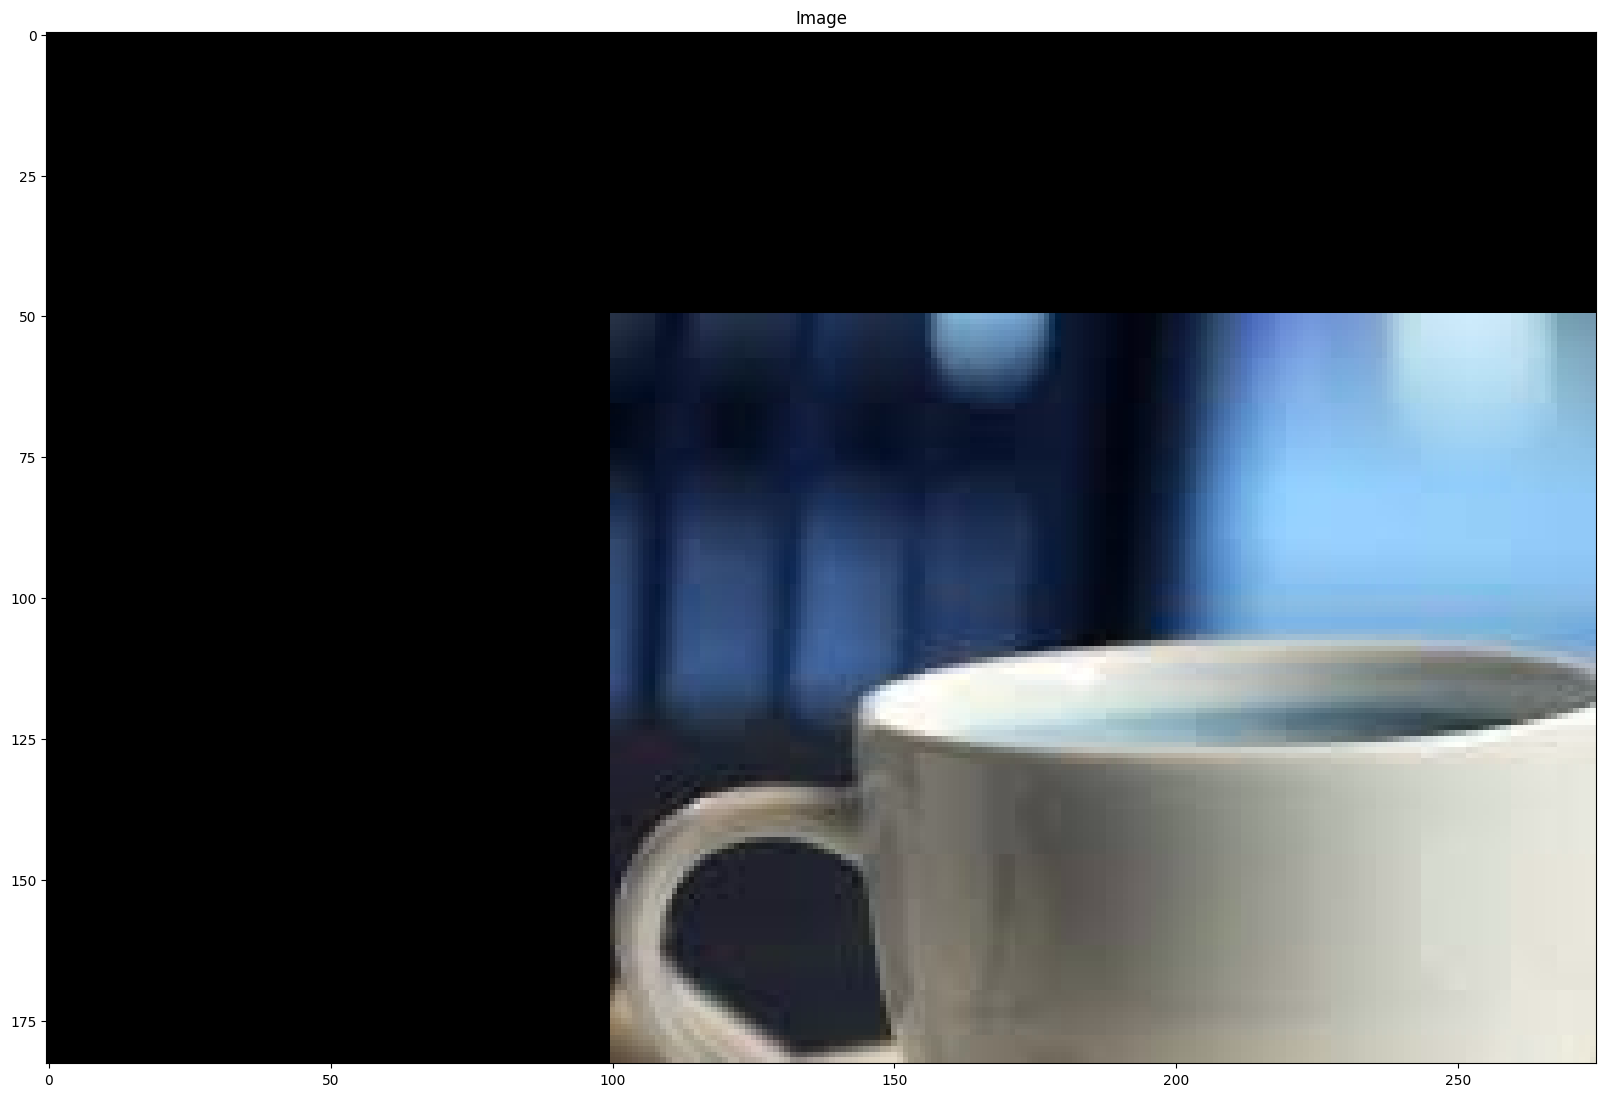

In [ ]:
ShowOneImage(dst)
cv.waitKey(0)
cv.destroyAllWindows()

## **Rotation**

Rotation of an image for an angle θ is achieved by the transformation matrix of the form

$$
M = \begin{bmatrix}
\cos{\theta} & -\sin{\theta} \\
\sin{\theta} & \cos{\theta}
\end{bmatrix}
$$

But OpenCV provides scaled rotation with adjustable center of rotation so that you can rotate at any location you prefer. The modified transformation matrix is given by:


\begin{bmatrix}
\alpha & \beta & (1 - \alpha) \cdot \text{center.x} - \beta \cdot \text{center.y} \\
-\beta & \alpha & \beta \cdot \text{center.x} + (1 - \alpha) \cdot \text{center.y}
\end{bmatrix}


where:


$\alpha = \text{scale} \cdot \cos{\theta}, \quad \beta = \text{scale} \cdot \sin{\theta}$


To find this transformation matrix, OpenCV provides a function, `cv.getRotationMatrix2D`. Check out the below example which rotates the image by 90 degrees with respect to the center without any scaling.


In [ ]:
# function rotate image
def rotate_image(image, angle):
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    rotation_matrix = cv.getRotationMatrix2D(center, angle, 1.0)
    rotated_image = cv.warpAffine(image, rotation_matrix, (w, h))
    return rotated_image

rotated = rotate_image(img, 90)

rotated Dimensions :  (183, 275, 3)


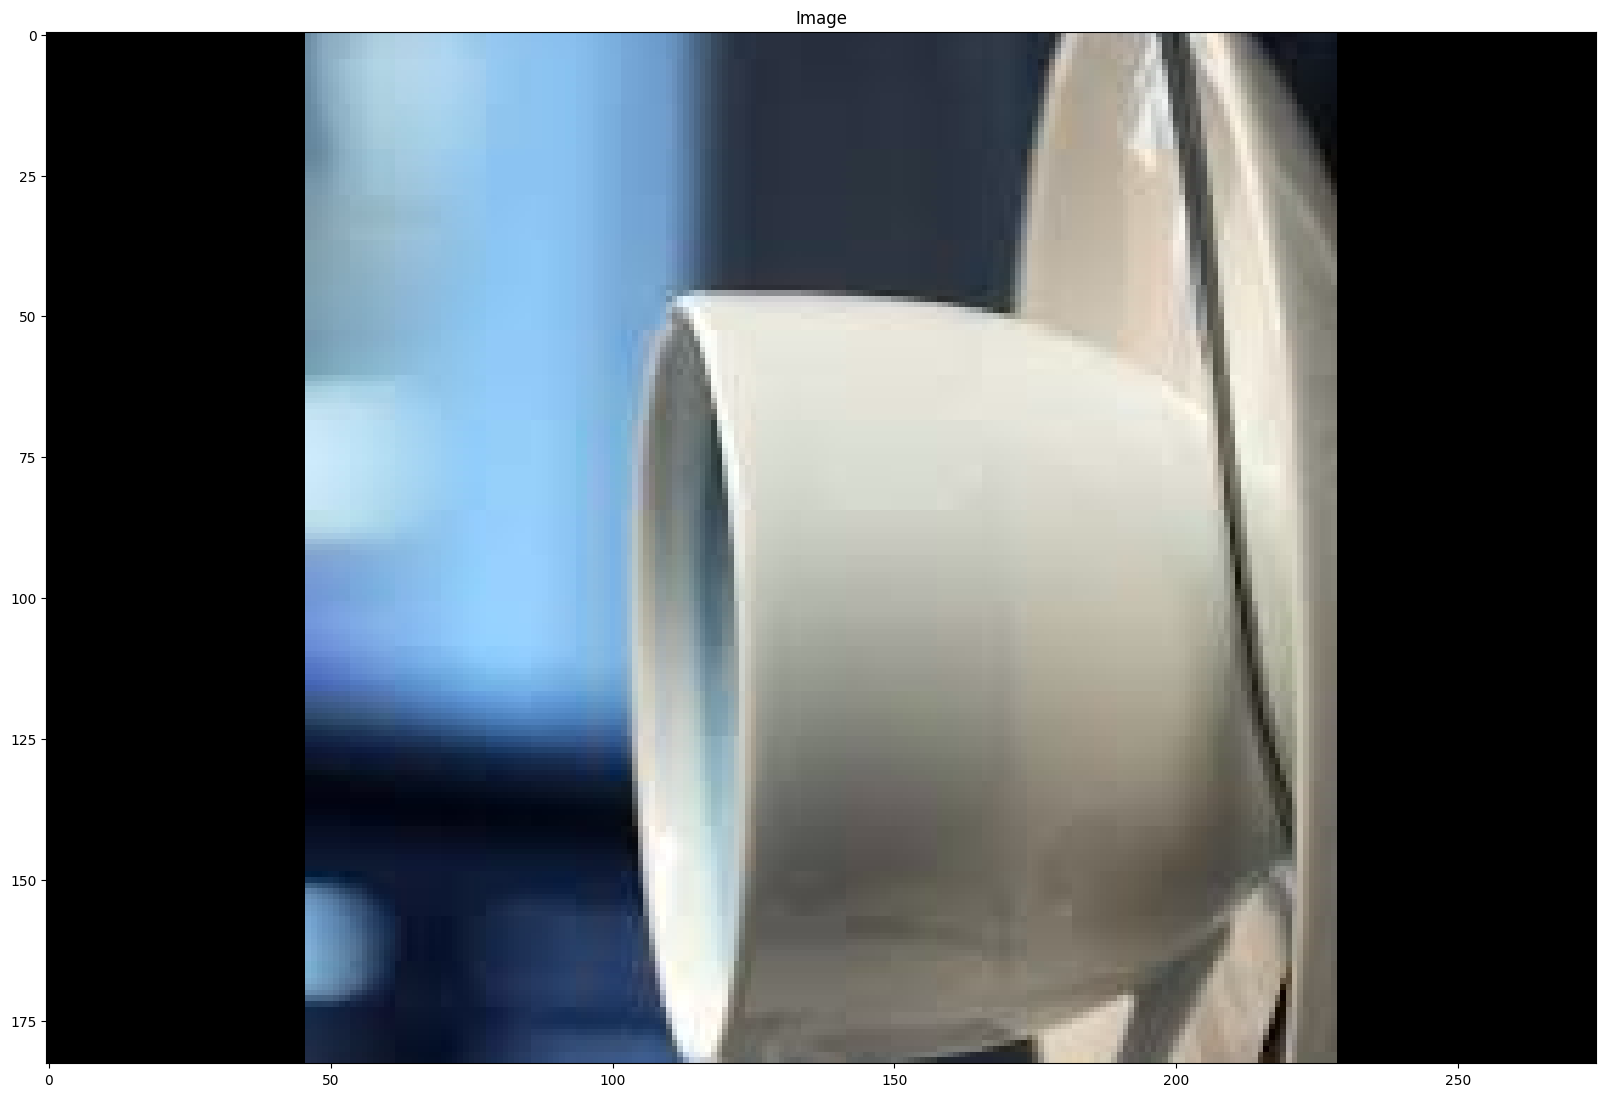

In [ ]:
print('rotated Dimensions : ',rotated.shape)
ShowOneImage(rotated)

# **Affine Transformation**

In affine transformation, all parallel lines in the original image will still be parallel in the output image. To find the transformation matrix, we need three points from the input image and their corresponding locations in the output image. Then cv.getAffineTransform will create a 2x3 matrix which is to be passed to cv.warpAffine.

Check the below example, and also look at the points I selected (which are marked in green color):

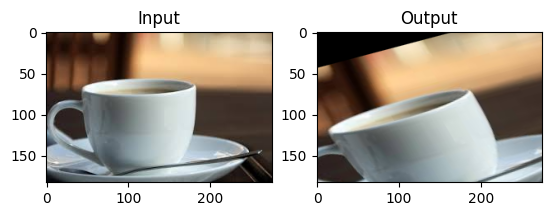

In [ ]:
def affine_transform(image_path, pts1, pts2):
    """
    Applies an affine transformation to the image based on two sets of points.

    Parameters:
    - image_path: Path to the input image.
    - pts1: List of three points in the original image.
    - pts2: List of three points in the output image to map to.

    Returns:
    - dst: The transformed image.
    """
    img = cv.imread(image_path)
    assert img is not None, "File could not be read, check with os.path.exists()"
    rows, cols, ch = img.shape

    # Compute the affine transform matrix
    M = cv.getAffineTransform(np.float32(pts1), np.float32(pts2))

    # Apply the affine transformation
    dst = cv.warpAffine(img, M, (cols, rows))

    # Display the input and output images
    plt.subplot(121), plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)), plt.title('Input')
    plt.subplot(122), plt.imshow(cv.cvtColor(dst, cv.COLOR_BGR2RGB)), plt.title('Output')
    plt.show()

    return dst

# Ví dụ sử dụng:
pts1 = [[50, 50], [200, 50], [50, 200]]
pts2 = [[10, 100], [200, 50], [100, 250]]
dst = affine_transform('coffee.jpg', pts1, pts2)
# affine_transform('coffee.jpg', pts1, pts2)


# Record Image

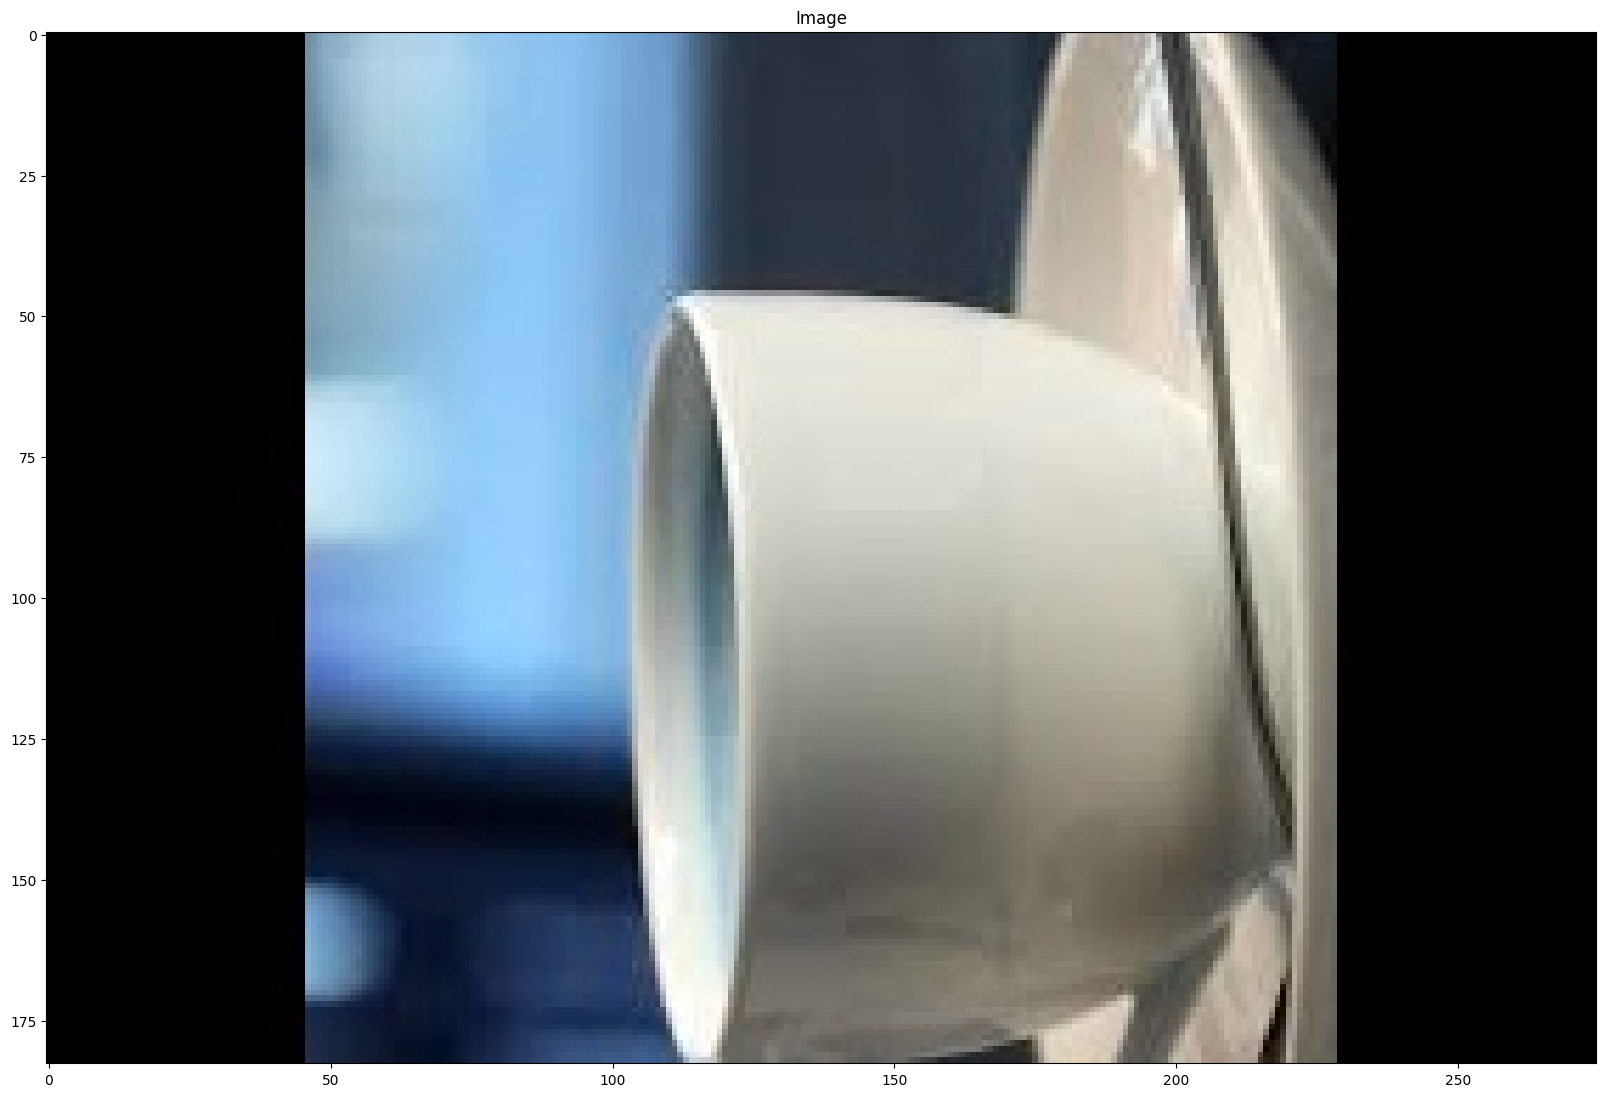

In [ ]:
cv.imwrite('rotated_coffee_image.jpg', rotated)
rotated = cv.imread('rotated_coffee_image.jpg',cv.COLOR_BGR2RGB)
ShowOneImage(rotated)

To save an image with a specified quality (ranging from 0 to 100) in OpenCV, especially for formats like JPEG, you can use the cv.imwrite() function with additional parameters. The quality parameter controls the compression level of the JPEG file, where a higher value indicates better quality but a larger file size

In [ ]:
cv.imwrite('rotated_coffee_image_qua_90.jpg', rotated, [int(cv.IMWRITE_JPEG_QUALITY), 90])

# Read the saved image
rotated = cv.imread('rotated_coffee_image_qua_90.jpg')

# Convert the image from BGR to RGB (for displaying with matplotlib)
rotated_rgb = cv.cvtColor(rotated, cv.COLOR_BGR2RGB)


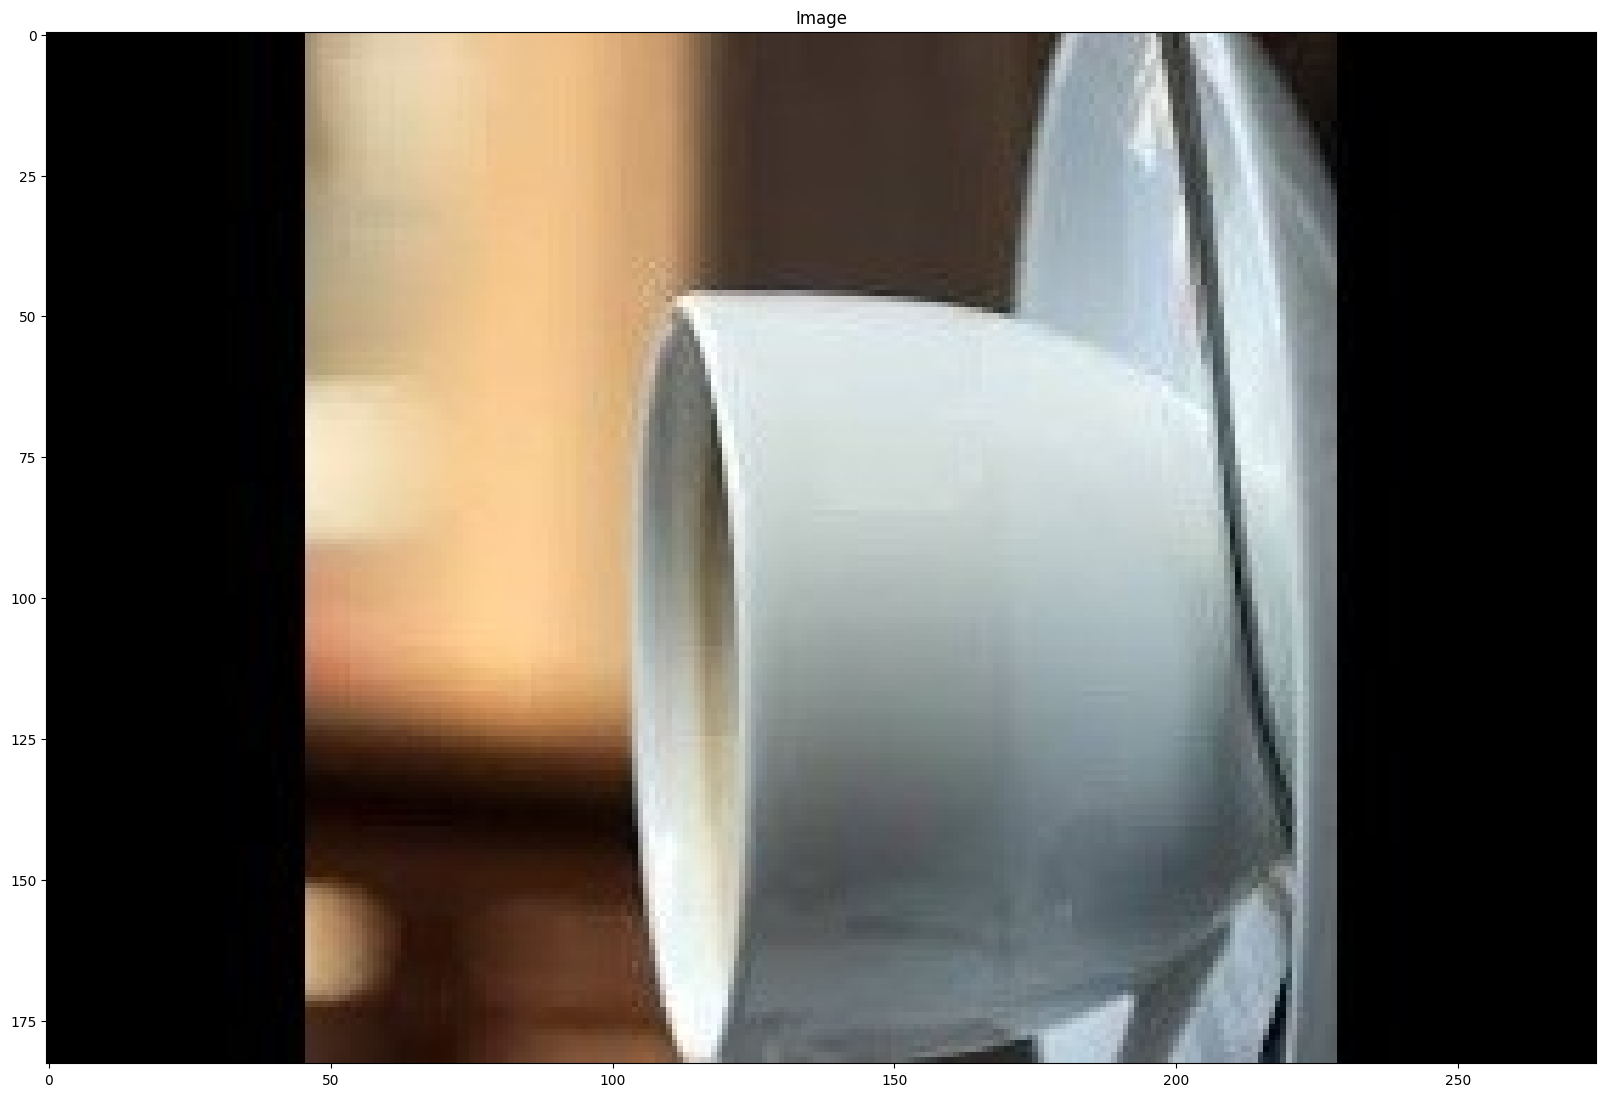

In [ ]:
ShowOneImage(rotated_rgb)

# Exercise


1. **Choose an image from a list (excluding 'cat')**: Assume you have a list of image paths, and you'll select one, but not the one named 'cat'.

2. **Choose an external image**: Pick an image from outside the list (any image from your local machine).

3. **Perform operations**:
   - Read and display the image
   - Scale the image
   - Rotate the image
   - Translate the image (shift its position)
   - Apply Affine Transformation to the image
